In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
df_audi=pd.read_csv("audi.csv")
df_bmw=pd.read_csv("bmw.csv")
df_cclass=pd.read_csv("cclass.csv")

In [3]:
df_audi.info()
print('\n')
df_bmw.info()
print('\n')
df_cclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-n

In [5]:
print(df_audi.head(),'\n',df_bmw.head(),'\n',df_cclass.head())

  model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0 
        model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0   
       model  year  pric

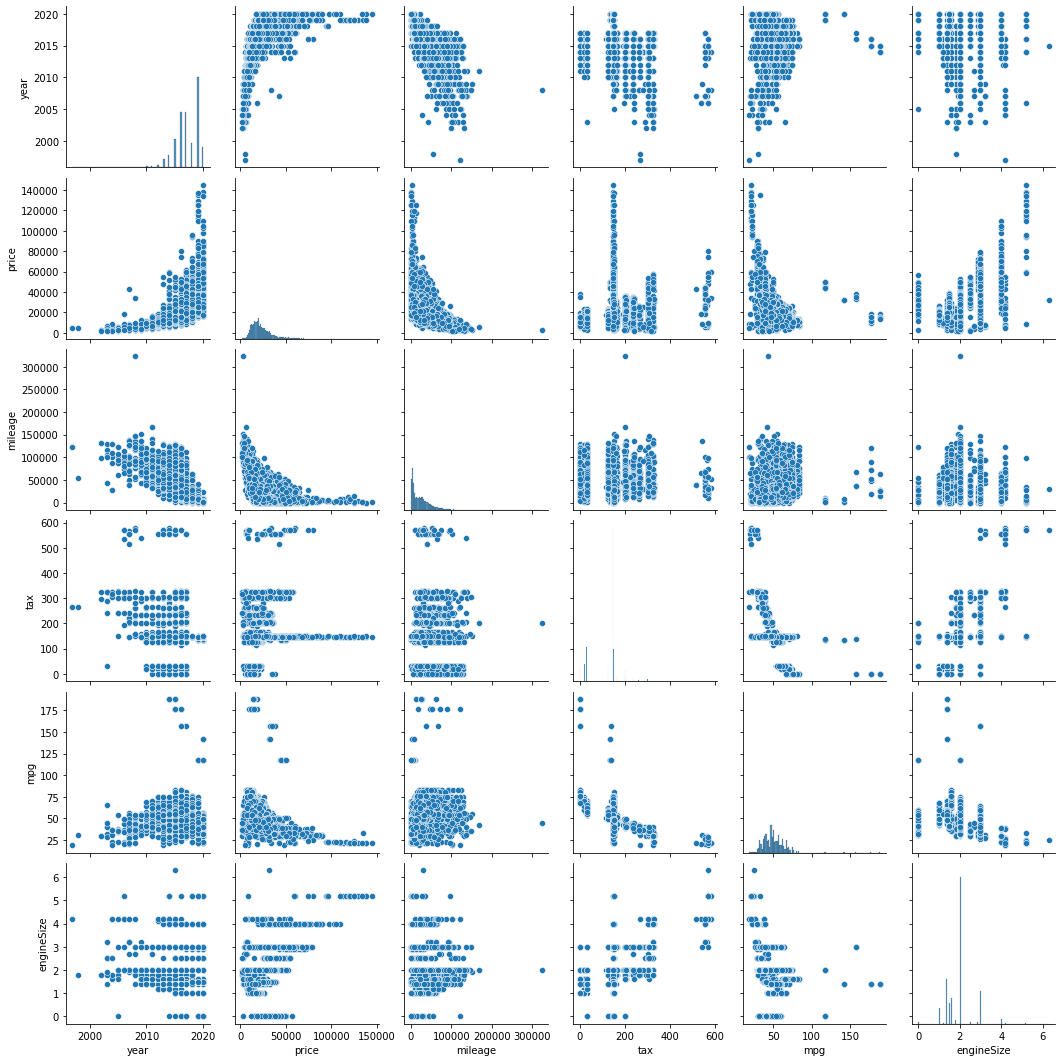

In [5]:
sb.pairplot(data=df_audi)

In [2]:
x=df_audi.iloc[:,[1,3,4,6,7,8]]
y=df_audi.iloc[:,2:3]

x1=df_bmw.iloc[:,[1,3,4,6,7,8]]
y1=df_bmw.iloc[:,2:3]

x2=df_cclass.iloc[:,[1,3,4,6]]
y2=df_cclass.iloc[:,2:3]

In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()#approach 1,2,3

x['transmission']=le.fit_transform(x['transmission'])

x1['transmission']=le.fit_transform(x1['transmission'])

x2['transmission']=le.fit_transform(x2['transmission'])

c:\users\runnu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\runnu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\runnu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [9]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=10)
x1_train,x1_test,y1_train,y1_test=tts(x1,y1,test_size=0.2,random_state=10)
x2_train,x2_test,y2_train,y2_test=tts(x2,y2,test_size=0.2,random_state=10)
#print(x_train,x_test,y_train,y_test)

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
h=lr.predict(x_test)
s=lr.score(x_test,y_test)
pd.to_pickle(lr,"car_v1")

lr.fit(x1_train,y1_train)
h1=lr.predict(x1_test)
s1=lr.score(x1_test,y1_test)
pd.to_pickle(lr,"car_v2")

lr.fit(x2_train,y2_train)
h2=lr.predict(x2_test)
s2=lr.score(x2_test,y2_test)
pd.to_pickle(lr,"car_v3")
#print(x_test[0:5],'\n',h[0:5],"\n",y_test[0:5])

Text(0, 0.5, 'original price')

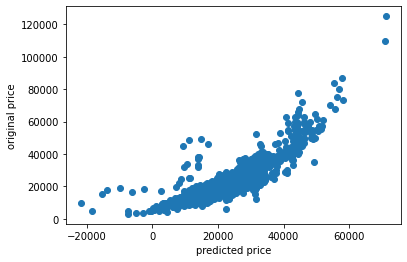

In [11]:
plt.scatter(h,y_test)
plt.xlabel('predicted price')
plt.ylabel('original price')

Text(0, 0.5, 'original price')

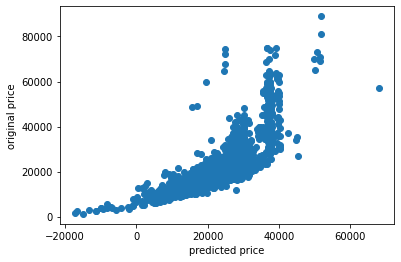

In [12]:
plt.scatter(h1,y1_test)
plt.xlabel('predicted price')
plt.ylabel('original price')

Text(0, 0.5, 'original price')

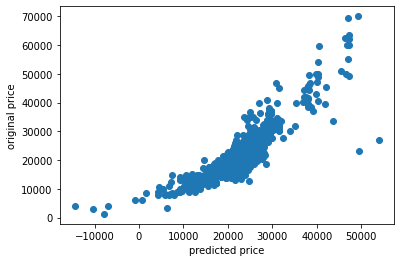

In [13]:
plt.scatter(h2,y2_test)
plt.xlabel('predicted price')
plt.ylabel('original price')

In [14]:
print(s,s1,s2)

0.7826761889660255 0.6525514850789036 0.7793356925130172
